In [1]:
# house price prediction using multiple linear regression
# import
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from pylab import rcParams
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import tkinter as tk
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg
from matplotlib.figure import Figure
import webbrowser
import math

%matplotlib inline

sns.set(style='whitegrid', palette='muted', font_scale=1.5)

rcParams['figure.figsize'] = 14, 8

RANDOM_SEED = 42

np.random.seed(RANDOM_SEED)

In [2]:
df_hse = pd.read_csv('D:\FIRST\PRESENT 2ND\kl_kaggle\model_cat\hse_full.csv',index_col=0)
# D:\FIRST\PRESENT 2ND\kl_kaggle\model_cat
# mix05_sky_land_house.csv  | hse_full.csv
df_hse.head()

,Unnamed: 0.1,Location,Price,Rooms,Bathrooms,CarPorch,Furnishing,Year,State,Area,UnitType,PropertyType,BuiltUp
0,1983,"Jalan Klang Lama (Old Klang Road), Kuala Lumpur",660000,3,3,2.0,3.0,2019,Kuala Lumpur,Jalan Klang Lama (Old Klang Road),3.0,12.0,1495.0
1,2001,"Setapak, Kuala Lumpur",1100000,3,3,2.0,3.0,2019,Kuala Lumpur,Setapak,3.0,12.0,1523.0
2,2010,"KLCC, Kuala Lumpur",3490000,3,3,2.0,3.0,2019,Kuala Lumpur,KLCC,3.0,15.0,1560.0
3,2013,"Desa ParkCity, Kuala Lumpur",1400000,3,2,2.0,3.0,2019,Kuala Lumpur,Desa ParkCity,3.0,12.0,1572.0
4,2015,"Mont Kiara, Kuala Lumpur",950000,3,3,2.0,3.0,2019,Kuala Lumpur,Mont Kiara,3.0,12.0,1574.0


In [3]:
df_hse.info()
# exploring the sale price
df_hse['Price'].describe()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12717 entries, 0 to 12716
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0.1  12717 non-null  int64  
 1   Location      12717 non-null  object 
 2   Price         12717 non-null  int64  
 3   Rooms         12717 non-null  int64  
 4   Bathrooms     12717 non-null  int64  
 5   CarPorch      12717 non-null  float64
 6   Furnishing    12717 non-null  float64
 7   Year          12717 non-null  int64  
 8   State         12717 non-null  object 
 9   Area          12717 non-null  object 
 10  UnitType      12717 non-null  float64
 11  PropertyType  12717 non-null  float64
 12  BuiltUp       12717 non-null  float64
dtypes: float64(5), int64(5), object(3)
memory usage: 1.4+ MB


count    1.271700e+04
mean     1.306687e+06
std      1.418145e+06
min      8.800000e+04
25%      5.200000e+05
50%      7.900000e+05
75%      1.500000e+06
max      2.900000e+07
Name: Price, dtype: float64

In [4]:
# df_hse.drop('Unnamed: 0', axis = 'columns', inplace = True)
df_hse.drop('Unnamed: 0.1', axis = 'columns', inplace = True)
df_hse.drop('Location', axis = 'columns', inplace = True)
df_hse = df_hse.astype({"CarPorch":int, "Furnishing":int, "UnitType":int, "PropertyType":int, "BuiltUp":int})
df_hse.head()

,Price,Rooms,Bathrooms,CarPorch,Furnishing,Year,State,Area,UnitType,PropertyType,BuiltUp
0,660000,3,3,2,3,2019,Kuala Lumpur,Jalan Klang Lama (Old Klang Road),3,12,1495
1,1100000,3,3,2,3,2019,Kuala Lumpur,Setapak,3,12,1523
2,3490000,3,3,2,3,2019,Kuala Lumpur,KLCC,3,15,1560
3,1400000,3,2,2,3,2019,Kuala Lumpur,Desa ParkCity,3,12,1572
4,950000,3,3,2,3,2019,Kuala Lumpur,Mont Kiara,3,12,1574


In [5]:
df_hse.tail()

,Price,Rooms,Bathrooms,CarPorch,Furnishing,Year,State,Area,UnitType,PropertyType,BuiltUp
12712,2250000,6,6,2,1,2019,Kuala Lumpur,Taman Melawati,8,14,5000
12713,400000,1,2,1,1,2019,Kuala Lumpur,Jalan Klang Lama (Old Klang Road),9,15,775
12714,388000,1,2,1,1,2019,Kuala Lumpur,Jalan Klang Lama (Old Klang Road),9,15,775
12715,928000,2,2,1,1,2019,Kuala Lumpur,Mont Kiara,9,15,873
12716,6798000,6,7,5,1,2019,Kuala Lumpur,KLCC,5,12,6600


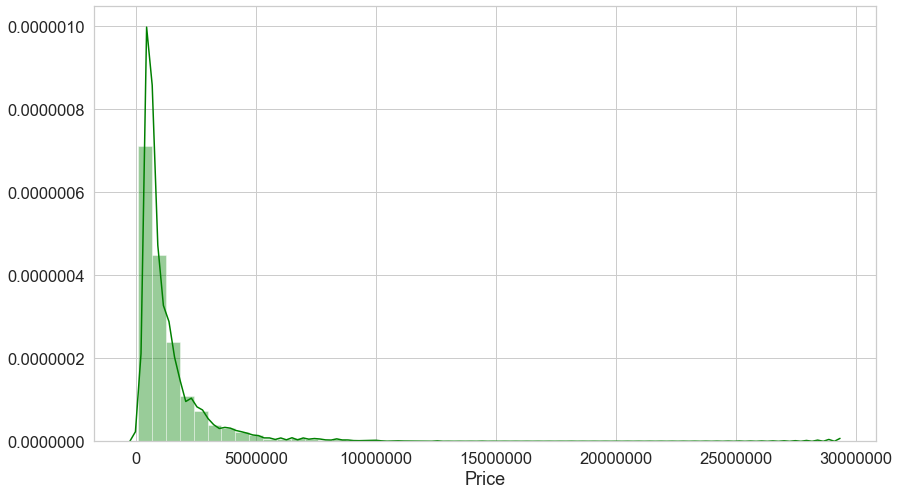

In [6]:
plt.ticklabel_format(style = 'plain')
sns.distplot(df_hse.Price,color='green')

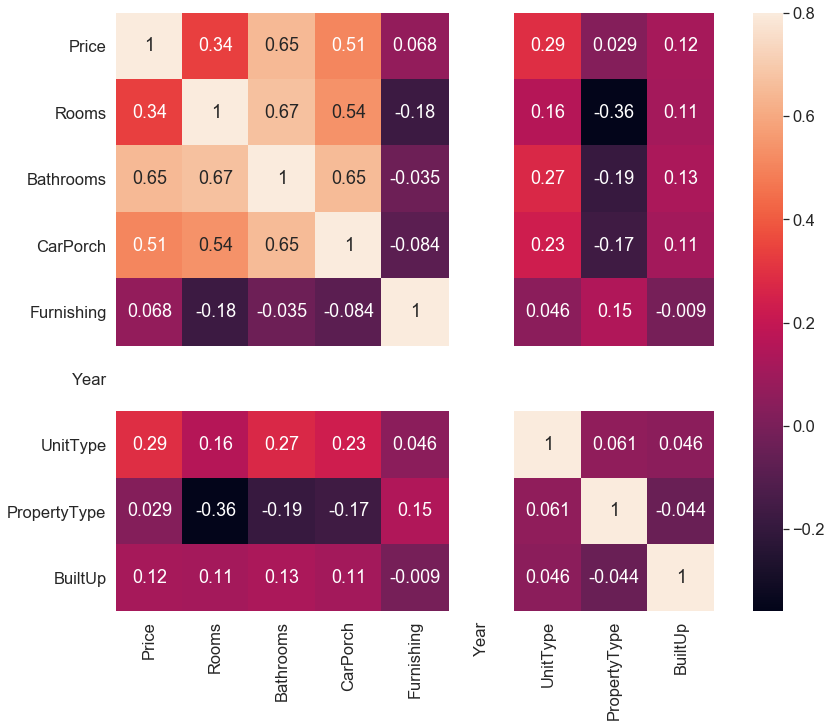

In [7]:
# heatmap df_hse, all
corrdata = df_hse.corr()
f, ax = plt.subplots(figsize=(14, 11))
sns.heatmap(corrdata, vmax=.8, annot=True, square=True);

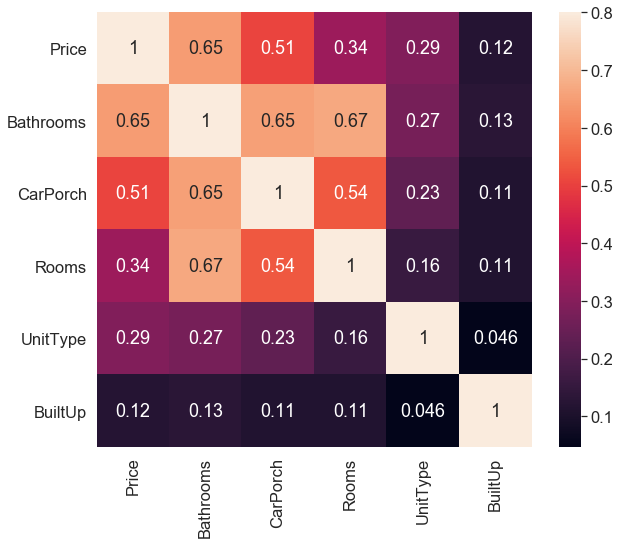

In [8]:
# heatmap df_hse, 5 top
# finding 5 most correlated to sale price
k = 6 #number of variables for heatmap
cols = corrdata.nlargest(k, 'Price')['Price'].index
f, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(df_hse[cols].corr(), vmax=.8, annot=True, square=True);

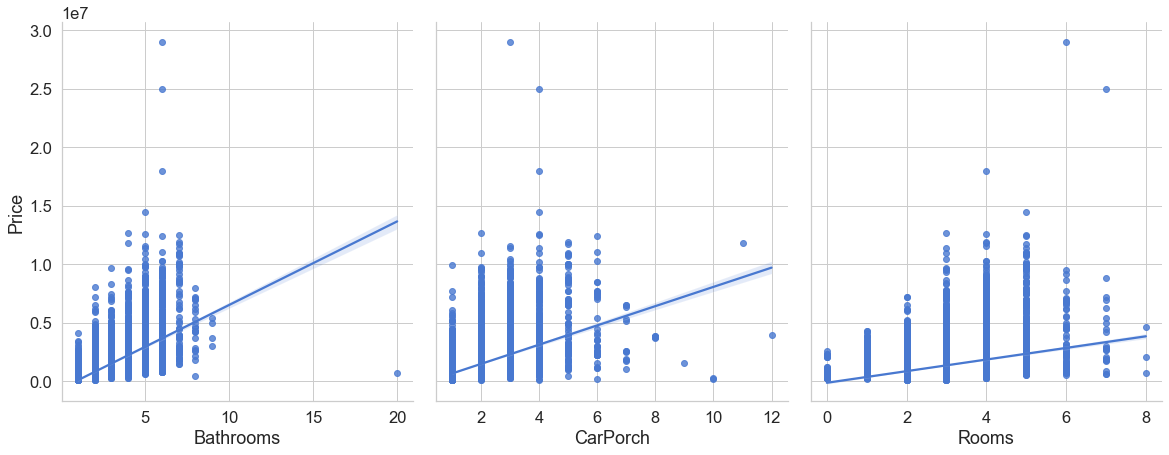

In [9]:
cols = ['Price', 'Bathrooms', 'CarPorch', 'Rooms']
# sns.pairplot(df_hse[cols], height = 4);
sns.pairplot(df_hse, x_vars=["Bathrooms", "CarPorch", "Rooms"], y_vars=["Price"],
             height=6, aspect=.9, kind="reg");

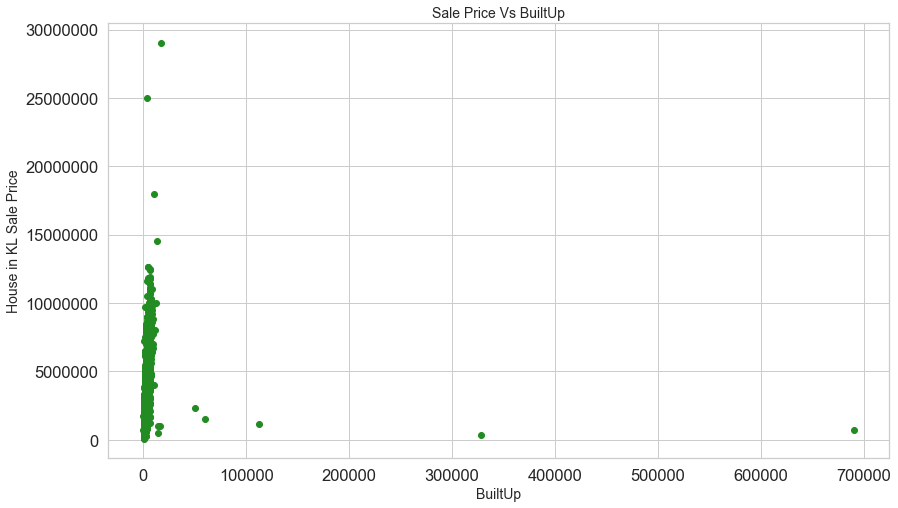

In [10]:
plt.ticklabel_format(style = 'plain')
plt.scatter(df_hse['BuiltUp'], df_hse['Price'], color='forestgreen')
plt.title('Sale Price Vs BuiltUp', fontsize=14)
plt.ylabel('House in KL Sale Price', fontsize=14)
plt.xlabel('BuiltUp', fontsize=14)
plt.grid(True)
plt.show()

In [11]:
# load data
y = df_hse['Price']
x = df_hse[['Bathrooms','CarPorch','Rooms']]

mlinear_reg = LinearRegression()  # create object for the class
mlinear_reg.fit(x, y)  # perform linear regression

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [12]:
# b0 = mlinear_reg.intercept_
# b1 = mlinear_reg.coef_
# b2 = b1
x.describe()

,Bathrooms,CarPorch,Rooms
count,12717.000000,12717.000000,12717.000000
mean,2.693638,1.758198,2.865456
std,1.284309,0.877592,0.966602
min,1.000000,1.000000,0.000000
25%,2.000000,1.000000,2.000000
50%,2.000000,2.000000,3.000000
75%,3.000000,2.000000,3.000000
max,20.000000,12.000000,8.000000


In [13]:
y.describe()

count    1.271700e+04
mean     1.306687e+06
std      1.418145e+06
min      8.800000e+04
25%      5.200000e+05
50%      7.900000e+05
75%      1.500000e+06
max      2.900000e+07
Name: Price, dtype: float64

In [14]:
# make prediction
# y_pred = mlinear_reg.predict(x)  # make predictions
# y_pred

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 42)
y_pred = mlinear_reg.predict(x_test)
print(y_pred)

[ 830311.06689841  530079.01194429 1563145.72714443 ...  832210.97349117
 1563145.72714443  832210.97349117]


In [15]:
# print the actual value
print(y_test)

6237      730000
1825      570000
3646      630000
12325     598000
11362    1200000
          ...   
2260      640000
1775     1000000
3344     3000000
3669     1380000
93       1380000
Name: Price, Length: 3180, dtype: int64


In [16]:
from sklearn.metrics import mean_squared_error
acc = mean_squared_error(y_test, y_pred)
print(acc)

1133001663037.7683


In [17]:
r_sq = mlinear_reg.score(x, y)
print('coefficient of determination:', r_sq)

coefficient of determination: 0.45430487039815176


In [18]:
# means of house price
hse_mean = df_hse.groupby('Area').median().Price
top_means = hse_mean > 600000
top_means
cat_mean = df_hse.groupby('Area')['Price'].median().sort_values()
cat_mean = cat_mean[:10]

list_top_means = list(top_means)
list_cat_mean = list(cat_mean)
    

def display_graph1():
    
    # lower = cat_mean[cat_mean < 100000]
    barch1 = cat_mean.plot(kind="barh")
#     rcParams['figure.figsize'] = 20, 12
#     plt.barh(top_means, hse_mean)
    plt.title("Standard Price of House according to Area")
    plt.ylabel("Areas in KL")
    plt.xlabel("Mean Price of House")
    


#     lns1 = plt.bar(y_pos,z)
#     plt.ylabel('Bar Graph')
#     plt.xlabel('Date')

    plt.twinx()
    lns2 = plt.plot(y_pos,y1,'r-',linewidth=2.5)
    lns3 = plt.plot(y_pos,y2,color='orange',linewidth=2.5)
    plt.ylabel('Line Data')
    plt.xticks(y_pos, x)
    plt.xlabel('X axis')
    plt.title('Graph 1')

    plt.legend([lns1, lns2[0], lns3[0]],["Bar", "Line 1", "Line 2"], loc="upper right")

    plt.draw()
    plt.show()

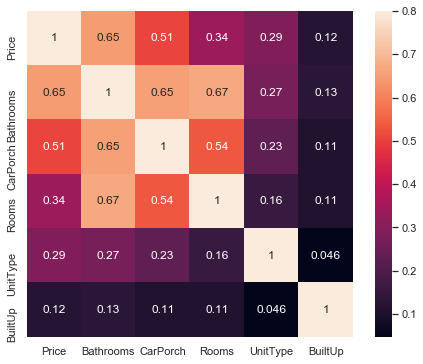

In [20]:
# tkinter GUI
root = tk.Tk()

root.title('House Price Predict')
canvas1 = tk.Canvas(root, width = 800, height = 550, bg = '#D3D3D3')
canvas1.pack()


# .intercept_ represents coefficient(𝑏₀) & .coef_,represents (𝑏₁)
# getting the intercept and coefficient into fx
# Intercept
intercept_res = ('Intercept: ', mlinear_reg.intercept_)
label_intercept = tk.Label(root, text = intercept_res, justify = 'center')
canvas1.create_window(360, 240, window = label_intercept)

# Coefficient
coefficient_res = ('Coefficient: ', mlinear_reg.coef_)
label_intercept = tk.Label(root, text = coefficient_res, justify = 'center')
canvas1.create_window(360, 260, window = label_intercept)

accuracy_res = ('MSE: ', acc)
label_accuracy = tk.Label(root, text = accuracy_res, justify = 'center')
canvas1.create_window(360, 280, window = label_accuracy)


# New_Bathrooms label and input
bath_label = tk.Label(root, text = 'Number of Bathrooms')
canvas1.create_window(305, 100, window = bath_label)

bath_input = tk.Entry(root)
canvas1.create_window(440, 100, window = bath_input)

# New_Carporch label and input
carp_label = tk.Label(root, text = 'Carporch Size(by car)')
canvas1.create_window(310, 130, window = carp_label)

carp_input = tk.Entry(root)
canvas1.create_window(440, 130, window = carp_input)

# New_Rooms label and input
rooms_label = tk.Label(root, text = 'Number of Rooms')
canvas1.create_window(315, 160, window = rooms_label)

rooms_input = tk.Entry(root)
canvas1.create_window(440, 160, window = rooms_input)

def values():
    global New_Bath #first input variable
    New_Bath = int(bath_input.get())
    
    global New_CarP
    New_CarP = int(carp_input.get())
    
    global New_Rooms
    New_Rooms = int(rooms_input.get())
    
    Prediction_Result = ('Predicted House Price: ', np.round(mlinear_reg.predict([[New_Bath, New_CarP, New_Rooms]]), 2))
    pred_label = tk.Label(root, text = Prediction_Result, bg = 'yellow')
    canvas1.create_window(350, 350, window = pred_label)

# button to predict and call function values
pred_btn = tk.Button(root, text = 'Predict House Price', command = values, bg = 'cyan')
canvas1.create_window(350, 205, window = pred_btn)


# # display_graph1
# disp_graph_btn = tk.Button(root, text='Graph 1', command=display_graph1, bg = 'orange') # Call the graph_1 function
# canvas1.create_window(290, 340, window = disp_graph_btn)

# display dash for visualization

new = 1
url = "http://127.0.0.1:4051/"
# "http://localhost:63342/Habib/pycharmproj2/dashboard1/index3.html?_ijt=uagg900b7e6jg3hr4ahu550emg"

def openweb():
    webbrowser.open(url,new=new)

dash_btn = tk.Button(root, text = "The Visualization Dashboard",command=openweb)
canvas1.create_window(350, 380, window = dash_btn)
# dash_btn.pack()

# clear btn fx
def Reset():
    bath_input.delete(0, 'end')
    carp_input.delete(0, 'end')
    rooms_input.delete(0, 'end')
#     pred_label.destroy() #NameError: name 'pred_label' is not defined
#     pred_label.set("")
#     pred_label['text'] = ""

# clear button
clear_btn = tk.Button(root, text="Reset",command=Reset)
canvas1.create_window(440, 205, window = clear_btn)

# exit brn fx
def exitroot():
    root.quit() 
    root.destroy()

# button to quit
exit_btn = tk.Button(root, text = 'EXIT', command = exitroot, bg = 'red')
canvas1.create_window(680, 60, window = exit_btn)

# # heatmap df_hse, 5 top
# # finding 5 most correlated to sale price
# corrdata = df_hse.corr()
# k = 6 #number of variables for heatmap
# cols = corrdata.nlargest(k, 'Price')['Price'].index
# f, ax = plt.subplots(figsize=(10, 8))
# sns.heatmap(df_hse[cols].corr(), vmax=.8, annot=True, square=True);


def create_plot():
    sns.set(style="white")

    # Generate a large random dataset
    rs = np.random.RandomState(33)
    
    # Compute the correlation matrix
    corrdata = df_hse.corr()
    cols = corrdata.nlargest(k, 'Price')['Price'].index

    # Generate a mask for the upper triangle
#     mask = np.zeros_like(corr, dtype=np.bool)
#     mask[np.triu_indices_from(mask)] = True

    # Set up the matplotlib figure
    f, ax = plt.subplots(figsize=(8, 6))

    # Generate a custom diverging colormap
    cmap = sns.diverging_palette(220, 10, as_cmap=True)

    # Draw the heatmap with the mask and correct aspect ratio
    sns.heatmap(df_hse[cols].corr(), vmax=.8, annot=True, square=True);
#     sns.heatmap(corr, cmap=cmap, vmax=.3, center=0,
#                 square=True, linewidths=.5, cbar_kws={"shrink": .5})

    return f

# label = tk.Label(root, text="Matplotlib with Seaborn in Tkinter")
# label.pack()

fig = create_plot()

# canvas = FigureCanvasTkAgg(fig, master=root)  # A tk.DrawingArea.
# canvas.draw()
# canvas.get_tk_widget().pack()

# button = tk.Button(root, text="Quit", command=root.destroy)
# button.pack()

root.mainloop()